In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import ast

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
with open('params.txt') as f:
    params_text = f.read()

# Safely evaluate the string as a Python expression
grid_search_params = ast.literal_eval(params_text)

print(grid_search_params)

{'n_units': [4, 8], 'dropout_rate': [0.05, 0.1, 0.15], 'regularization': [0.001]}


In [4]:
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase


api_key = "rPM2EpHzzXL4jXgA5YSBCgwPJmwuooGc"

query = QueryBase(
    name="playtest_user_info",
    query_id=3456959,
)
print("Results available at", query.url())

dune = DuneClient(api_key = api_key)
#results = dune.run_query_csv(query)

# or as CSV
# results_csv = dune.run_query_csv(query)

# or as Pandas Dataframe
df = dune.run_query_dataframe(query)

2024-03-04 15:12:54,623 INFO dune_client.api.base executing 3456959 on medium cluster


Results available at https://dune.com/queries/3456959


2024-03-04 15:12:54,883 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:12:56,008 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:12:57,128 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:12:58,247 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:12:59,383 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:13:00,527 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:13:01,650 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING

2024-03-04 15:13:59,909 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:01,032 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:02,154 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:03,295 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:04,411 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:05,624 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:14:06,760 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING

2024-03-04 15:15:05,248 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:06,383 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:07,498 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:08,618 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:09,747 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:10,864 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING
2024-03-04 15:15:11,971 INFO dune_client.api.base waiting for query execution 01HR500XZM59JGPBY5X2VCET8G to complete: ExecutionState.EXECUTING

In [5]:
df

,wallet_id,total_balance,nft_bought,nft_sold,questflags,country_code,realised_Webb_profit
0,0xda492ff9d2672128a737a0e133a1ecb001808a01,51.413442,87,58,"[""player_has_entered_dc"",""major_ability"",""dc_p...",United States,0.0
1,0xb41ba0cb373f265d68d4e023da4ad63df276a5bc,0.587048,0,0,"[""player_has_entered_dc"",""dc_player_reached_co...",United Kingdom,0.0
2,0x5d1e3207bc46fc2da1e3cbe2ce3ff5e963c4bd0b,0.000000,0,0,"[""player_has_entered_dc""]",United States,0.0
3,0xffd8864d215c0f8923e019fec11aab242819dc2c,21.011313,0,0,"[""player_has_entered_dc"",""major_ability"",""play...",Japan,0.0
4,0xa75fa9d9dbc29d0e5d3b7646755e32f9b44936bf,71.921902,0,3,"[""player_has_entered_dc""]",Singapore,0.0
...,...,...,...,...,...,...,...
1783,0x693ec8439d88846cd2fcf63eac4406c1765812ee,75.601029,0,7,"[""player_has_entered_dc"",""major_ability"",""play...",Japan,0.0
1784,0xffc08d8d10d97b36e23f7e73731608397592ba97,95.307152,0,3,"[""player_has_entered_dc"",""major_ability""]",Singapore,0.0
1785,0xe039b7965dee41e18d6717bf9cbe46f7dbef991b,0.000000,0,0,"[""player_has_entered_dc""]",United States,0.0
1786,0xb02827a00bacec4c80b07fbe91968db0662beee6,328.319254,285,172,"[""player_has_entered_dc"",""major_ability"",""dc_p...",United Kingdom,0.0


In [6]:
def find_highest_combat_room(flags_str):
    # Convert the string representation of the list back to a list
    try:
        # Safely convert the string representation of the list back to a list
        flags_list = eval(flags_str)
    except (SyntaxError, NameError, TypeError):
        # Return 0 if there is an error in converting flags_str
        return 0
    # Find all combat room numbers
    room_numbers = [int(re.search(r'combat_room_(\d+)', flag).group(1)) for flag in flags_list if 'combat_room' in flag]
    if 'player_has_entered_dc' in flags_list:
        room_numbers.append(1)
    # Return the highest number found, or None if no combat room flags were found
    return max(room_numbers) if room_numbers else 0

# Apply the function to the 'flags' column and assign the result to a new column
df['highest_combat_room'] = df['questflags'].apply(find_highest_combat_room)
print(df)

                                       wallet_id  total_balance  nft_bought  \
0     0xda492ff9d2672128a737a0e133a1ecb001808a01      51.413442          87   
1     0xb41ba0cb373f265d68d4e023da4ad63df276a5bc       0.587048           0   
2     0x5d1e3207bc46fc2da1e3cbe2ce3ff5e963c4bd0b       0.000000           0   
3     0xffd8864d215c0f8923e019fec11aab242819dc2c      21.011313           0   
4     0xa75fa9d9dbc29d0e5d3b7646755e32f9b44936bf      71.921902           0   
...                                          ...            ...         ...   
1783  0x693ec8439d88846cd2fcf63eac4406c1765812ee      75.601029           0   
1784  0xffc08d8d10d97b36e23f7e73731608397592ba97      95.307152           0   
1785  0xe039b7965dee41e18d6717bf9cbe46f7dbef991b       0.000000           0   
1786  0xb02827a00bacec4c80b07fbe91968db0662beee6     328.319254         285   
1787  0xbcf2cf76dc906a5e2bc08563ecd0da68e53b24b8       0.000000           0   

      nft_sold                                     

In [7]:
df = df[df["realised_Webb_profit"]!=0]
Y = df["realised_Webb_profit"] #target
X= df.drop(["wallet_id","realised_Webb_profit","questflags"], axis = 1) #features


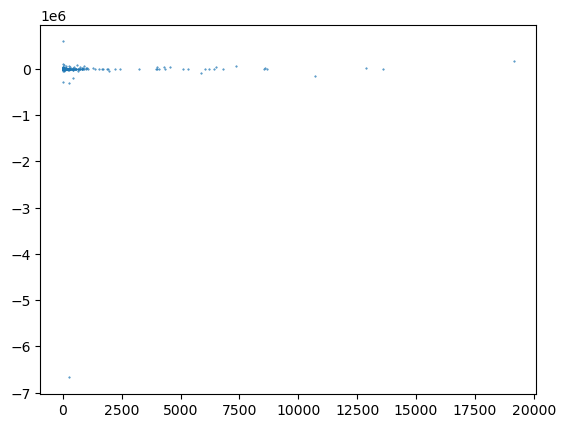

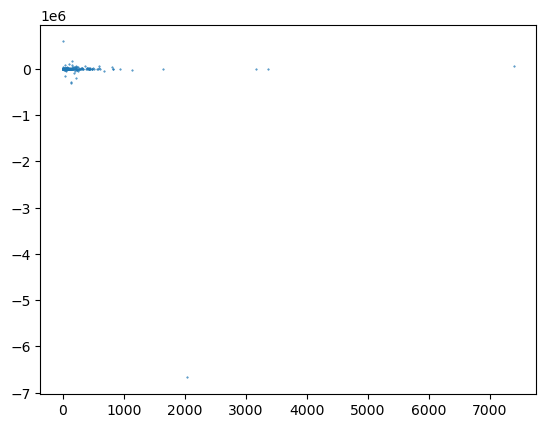

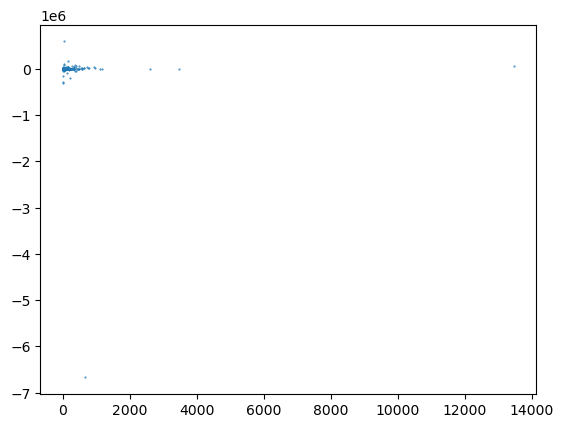

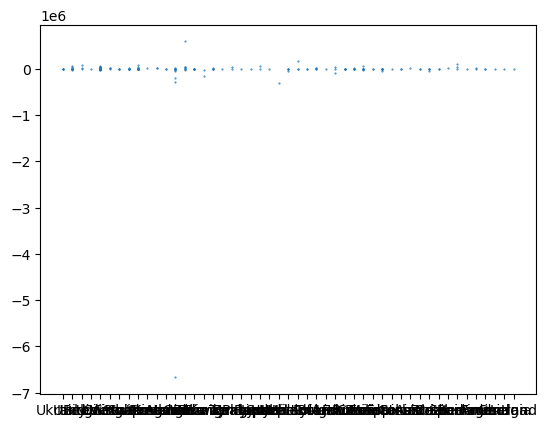

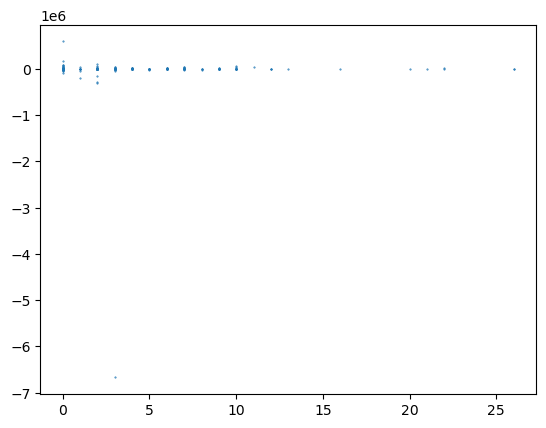

In [12]:
for feature in X.columns:
    plt.scatter(X[feature],Y,s = 0.2)
    plt.show()

In [8]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [9]:


numerical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor  = ColumnTransformer(transformers = 
        [('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

X_transformed = preprocessor.fit_transform(X)

# Directly accessing the one-hot encoder within the categorical transformer pipeline
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']

# Getting feature names from one-hot encoder for categorical columns
onehot_feature_names = onehot_encoder.get_feature_names_out(categorical_cols)

# Your numerical columns remain unchanged, so they are directly used
numerical_feature_names = numerical_cols

# Combining both sets of names
feature_names = np.concatenate([numerical_feature_names, onehot_feature_names])

X_transformed = X_transformed.toarray()


In [10]:
# Linear regression 
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)



In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train_LR, y_train_LR)
predictions_lr = lr_model.predict(X_test_LR)
#mae_lr = mean_absolute_error(y_test_LR, predictions_lr)
mse_lr = mean_squared_error(y_test_LR, predictions_lr)
r2_lr = r2_score(y_test_LR, predictions_lr)

In [12]:
# Deep learning model
Y_scaler = StandardScaler()
Y_scaled = Y_scaler.fit_transform(Y.values.reshape(-1, 1)).flatten()  # Assuming Y is a pandas Series

# Assuming your feature names are stored in X.columns after preprocessing


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y_scaled, test_size=0.2, random_state=42)


In [14]:
def build_model(n_units=64, dropout_rate=0.01, regularization=0.01):
    model = Sequential([
        Dense(n_units, activation='relu', kernel_regularizer=l2(regularization), input_shape=[X_train.shape[1]]),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [15]:
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=10)


C:\Users\theoi\AppData\Local\Temp\ipykernel_15332\2937580538.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=10)


In [16]:
grid = GridSearchCV(estimator=model, param_grid=grid_search_params, cv=3, scoring='neg_mean_squared_error')

In [17]:
grid_result = grid.fit(X_train, Y_train)


Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 2.6779
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 2.7003
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5876
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6584
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.4490
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.4668
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.4749
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3281
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2739
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3127
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3455
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3367
Epoch 13/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 3.5055
Epoch 2/100
12/12 [==============================] - 0s 997us/step - loss: 2.8867
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 3.5183
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 3.3712
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 3.0112
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 3.2096
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.8757
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 2.8793
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 3.1002
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6911
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5760
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5343
Epoch 13/100
12/12 [===========================

Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 3.5849
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 3.1366
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 3.1672
Epoch 4/100
12/12 [==============================] - 0s 997us/step - loss: 3.0871
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6392
Epoch 6/100
12/12 [==============================] - 0s 997us/step - loss: 2.8894
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.7465
Epoch 8/100
12/12 [==============================] - 0s 997us/step - loss: 2.3841
Epoch 9/100
12/12 [==============================] - 0s 997us/step - loss: 2.3150
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 1.8772
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2683
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3972
Epoch 13/100
12/12 [=========

12/12 [==============================] - 0s 1ms/step - loss: 3.7436
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 3.6349
Epoch 3/100
12/12 [==============================] - 0s 997us/step - loss: 3.0265
Epoch 4/100
12/12 [==============================] - 0s 998us/step - loss: 3.0468
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6985
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6949
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5063
Epoch 8/100
12/12 [==============================] - 0s 997us/step - loss: 2.2180
Epoch 9/100
12/12 [==============================] - 0s 997us/step - loss: 2.3015
Epoch 10/100
12/12 [==============================] - 0s 997us/step - loss: 2.2358
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2047
Epoch 12/100
12/12 [==============================] - 0s 997us/step - loss: 2.2215
Epoch 13/100
12/12 [=================

6/6 [==============================] - 0s 1ms/step
Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 1.9776
Epoch 2/100
12/12 [==============================] - 0s 997us/step - loss: 1.6896
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 1.7557
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 1.5479
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 1.5579
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1937
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 1.2976
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 1.2390
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 1.0952
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.9060
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7592
Epoch 12/100
12/12 [==============================] - 0s 1ms/step

6/6 [==============================] - 0s 1ms/step
Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 3.9674
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 4.2163
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 3.4283
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 3.4775
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 3.5979
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.9777
Epoch 7/100
12/12 [==============================] - 0s 997us/step - loss: 3.1981
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 2.9616
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 3.1408
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5937
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.4782
Epoch 12/100
12/12 [==============================] - 0s 1ms/step

6/6 [==============================] - 0s 1ms/step
Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 3.3146
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6914
Epoch 3/100
12/12 [==============================] - 0s 997us/step - loss: 2.6513
Epoch 4/100
12/12 [==============================] - 0s 997us/step - loss: 2.6885
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2386
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6454
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.1052
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 1.9969
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5085
Epoch 10/100
12/12 [==============================] - 0s 997us/step - loss: 1.9110
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 1.7939
Epoch 12/100
12/12 [==============================] - 0s 997u

6/6 [==============================] - 0s 1ms/step
Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 1.0453
Epoch 2/100
12/12 [==============================] - 0s 997us/step - loss: 0.6779
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.9017
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7084
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7175
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6349
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5499
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5212
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5247
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4604
Epoch 12/100
12/12 [==============================] - 0s 1ms/step

6/6 [==============================] - 0s 4ms/step
Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 3.7385
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 3.6656
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 2.8946
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 3.1833
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.7101
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6873
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 2.6124
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 2.4525
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3100
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2413
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3676
Epoch 12/100
12/12 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 1ms/step
Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5428
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 2.0121
Epoch 3/100
12/12 [==============================] - 0s 997us/step - loss: 2.0421
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3236
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 2.7921
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2.3208
Epoch 7/100
12/12 [==============================] - 0s 997us/step - loss: 2.5732
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 2.2381
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 2.5947
Epoch 10/100
12/12 [==============================] - 0s 997us/step - loss: 2.4168
Epoch 11/100
12/12 [==============================] - 0s 998us/step - loss: 2.1125
Epoch 12/100
12/12 [==============================] - 0s 99

18/18 [==============================] - 0s 2ms/step - loss: 0.9212


In [18]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_params = grid_result.best_params_

Best: -1.323466 using {'dropout_rate': 0.1, 'n_units': 4, 'regularization': 0.001}


In [19]:


best_model = build_model(
   64,0.1,0.001
)

In [20]:

optimizer = Adam(learning_rate=0.001) # Adjust the learning rate as needed

best_model.compile(optimizer='adam',
              loss = 'mean_absolute_error',
              metrics = ['mean_absolute_error']
             )

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)


history = best_model.fit(X_train, Y_train, epochs = 150, validation_split = 0.2, callbacks = [early_stopping])



Epoch 1/150
5/5 [==============================] - 1s 42ms/step - loss: 1.0140 - mean_absolute_error: 0.9577 - val_loss: 0.2101 - val_mean_absolute_error: 0.1551
Epoch 2/150
5/5 [==============================] - 0s 11ms/step - loss: 0.8584 - mean_absolute_error: 0.8040 - val_loss: 0.2238 - val_mean_absolute_error: 0.1704
Epoch 3/150
5/5 [==============================] - 0s 11ms/step - loss: 0.8563 - mean_absolute_error: 0.8035 - val_loss: 0.2384 - val_mean_absolute_error: 0.1866
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6868 - mean_absolute_error: 0.6355 - val_loss: 0.2419 - val_mean_absolute_error: 0.1916
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7007 - mean_absolute_error: 0.6508 - val_loss: 0.2338 - val_mean_absolute_error: 0.1848
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6409 - mean_absolute_error: 0.5924 - val_loss: 0.2213 - val_mean_absolute_error: 0.1736
Epoch 7/150
5/5 [==============

5/5 [==============================] - 0s 6ms/step - loss: 0.3154 - mean_absolute_error: 0.2879 - val_loss: 0.1329 - val_mean_absolute_error: 0.1055
Epoch 102/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2839 - mean_absolute_error: 0.2565 - val_loss: 0.1283 - val_mean_absolute_error: 0.1009
Epoch 103/150
5/5 [==============================] - 0s 6ms/step - loss: 0.3001 - mean_absolute_error: 0.2728 - val_loss: 0.1271 - val_mean_absolute_error: 0.0998
Epoch 104/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2867 - mean_absolute_error: 0.2594 - val_loss: 0.1271 - val_mean_absolute_error: 0.0999
Epoch 105/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2739 - mean_absolute_error: 0.2467 - val_loss: 0.1255 - val_mean_absolute_error: 0.0983
Epoch 106/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2725 - mean_absolute_error: 0.2453 - val_loss: 0.1200 - val_mean_absolute_error: 0.0928
Epoch 107/150
5/5 [=================

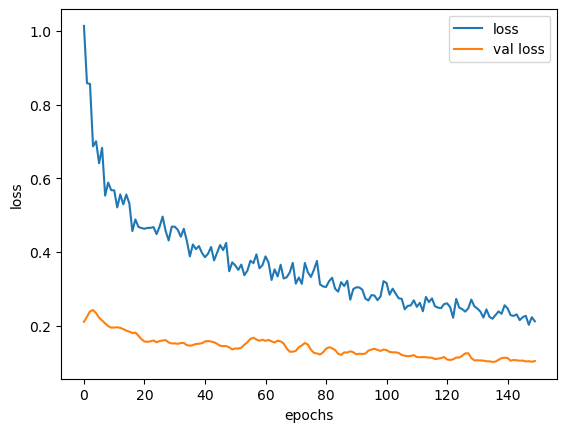

In [22]:
plt.plot(history.history['loss'], label  = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [23]:
best_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0628 - mean_absolute_error: 0.0380


[0.06283262372016907, 0.03795039281249046]

In [24]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(179, 53) (45, 53) (179,) (45,)


In [25]:
#de scaling targets
predictions_scaled = (best_model.predict(X_test)).flatten()
predictions = Y_scaler.inverse_transform(predictions_scaled.reshape(-1,1)).flatten()
Y_test = Y_scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

2/2 [==============================] - 0s 2ms/step


In [26]:
print(Y_test)

[ 1.12004146e+03 -7.65297196e+02 -3.87882000e+02 -1.59744417e+03
 -6.68436286e+02  1.88136591e+04  6.24523000e+03 -3.05788500e+02
 -2.17359860e+02 -4.68094863e+04 -2.75566865e+02 -8.46547200e+03
  5.56327050e+03 -6.17164915e+03 -5.05798900e+03  1.51037996e+04
 -6.58681572e+03  1.29499050e+04 -3.08655124e+03  4.35710659e+04
  5.22670374e+03 -6.33670850e+02 -6.36513150e+03  3.45704419e+04
 -4.86654600e+02 -1.16584812e+03  4.51999508e+04  1.63336360e+02
 -2.16887969e+03  8.63173711e+03  1.96800000e+01 -9.52728732e+04
 -3.93158791e+03 -1.48398550e+03 -1.98849932e+04 -3.60497488e+02
  1.64117574e+04  2.79086250e+02  1.08326524e+04  3.27537980e+02
  2.25937290e+03 -1.89483105e+02 -6.62644570e+01 -1.65182960e+03
  1.01397872e+03]


In [27]:
comparison = pd.DataFrame({'Actual Profit' : Y_test, 'Predicted Profit' : predictions, 'Difference' : Y_test - predictions})
print(comparison)

    Actual Profit  Predicted Profit     Difference
0     1120.041460      10562.606445   -9442.564985
1     -765.297196      17079.246094  -17844.543290
2     -387.882000     -12847.250000   12459.368000
3    -1597.444173      -5675.687012    4078.242839
4     -668.436286       8134.520020   -8802.956306
5    18813.659142      30077.343750  -11263.684608
6     6245.230000     -14309.594727   20554.824727
7     -305.788500     -26962.451172   26656.662672
8     -217.359860      10243.938477  -10461.298337
9   -46809.486255       1387.881470  -48197.367725
10    -275.566865     -11215.188477   10939.621612
11   -8465.472000     -21558.746094   13093.274094
12    5563.270500       5812.762207    -249.491707
13   -6171.649150       9838.758789  -16010.407939
14   -5057.989000       1239.430298   -6297.419298
15   15103.799601      25079.468750   -9975.669149
16   -6586.815720       5424.773926  -12011.589646
17   12949.904995       3255.236816    9694.668179
18   -3086.551244     -11173.70

<BarContainer object of 45 artists>

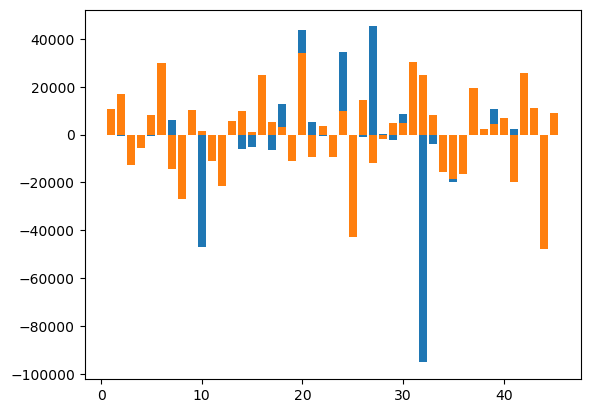

In [28]:
xa = np.arange(1,len(comparison)+1,step = 1)

plt.bar(xa, comparison['Actual Profit'])#,s = 0.2)
plt.bar(xa, comparison['Predicted Profit'])#, s = 0.2)

In [29]:
# Feature importance 

RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)
RFmodel.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [30]:

# Get feature importances
importances = RFmodel.feature_importances_

# Transform the importances into a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame to show the most important features at the top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
#print(feature_importance_df)

In [31]:
# Create a dictionary to hold the sum of importances for each original feature
aggregate_importances = {feature: 0 for feature in numerical_cols}

# OneHotEncoder features are prefixed with the original feature name, then an underscore, then the category
# For example, "country_US", "country_CA" would both map back to "country"
for feature, importance in zip(feature_names, importances):
    # Check if the feature is one of the one-hot encoded features
    if any(feature.startswith(cat_feature) for cat_feature in categorical_cols):
        # Find the original feature name (everything before the first underscore)
        original_feature = feature.split('_')[0]
        # Aggregate the importances
        aggregate_importances[original_feature] = aggregate_importances.get(original_feature, 0) + importance
    else:
        # For numerical features or any categorical features not one-hot encoded
        aggregate_importances[feature] = importance

# Convert aggregated importances back into a sorted DataFrame for visualization
aggregated_feature_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

In [32]:
# Create a dictionary to hold the sum of importances for each original feature
aggregate_importances = {feature: 0 for feature in numerical_cols}

# OneHotEncoder features are prefixed with the original feature name, then an underscore, then the category
# For example, "country_US", "country_CA" would both map back to "country"
for feature, importance in zip(feature_names, importances):
    # Check if the feature is one of the one-hot encoded features
    if any(feature.startswith(cat_feature) for cat_feature in categorical_cols):
        # Find the original feature name (everything before the first underscore)
        original_feature = feature.split('_')[0]
        # Aggregate the importances
        aggregate_importances[original_feature] = aggregate_importances.get(original_feature, 0) + importance
    else:
        # For numerical features or any categorical features not one-hot encoded
        aggregate_importances[feature] = importance

# Convert aggregated importances back into a sorted DataFrame for visualization
aggregated_feature_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print(aggregated_feature_importance_df)

               Feature  Importance
1           nft_bought    0.384672
4              country    0.352816
2             nft_sold    0.122386
0        total_balance    0.081083
3  highest_combat_room    0.059042


Text(0, 0.5, 'Importance')

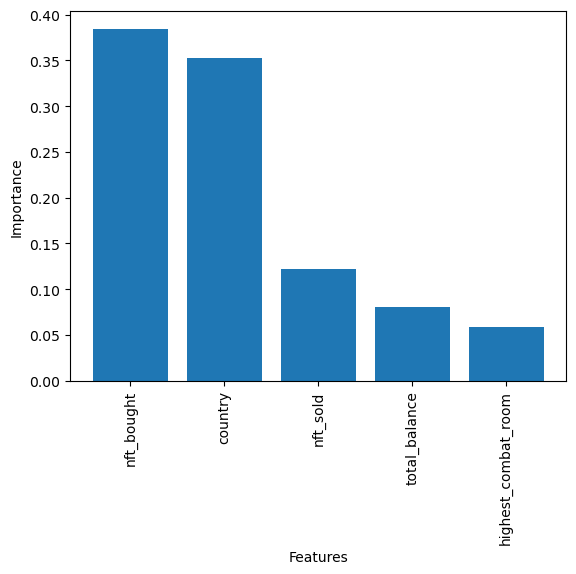

In [33]:
plt.bar(aggregated_feature_importance_df['Feature'],aggregated_feature_importance_df['Importance'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Features')
plt.ylabel('Importance')

In [34]:
def predict_target_for_walletid(wallet_id, df, preprocessor, model, y_scaler):
    """
    Predicts the target for a given userid.
    
    Parameters:
    - userid: The userid for which to predict the target.
    - df: The original DataFrame containing userids, features, and targets.
    - preprocessor: The fitted ColumnTransformer used for preprocessing.
    - model: The trained prediction model.
    - y_scaler: The scaler object used for the target variable.
    
    Returns:
    - The predicted target for the given userid.
    """
    predictions = {}
    
    for userid in wallet_ids:
        # Extract features for the given userid
        features = df[df['wallet_id'] == userid].drop(['wallet_id', 'realised_Webb_profit'], axis=1)
        
        # Skip if the user does not exist
        if features.empty:
            print(f"Userid {userid} not found.")
            predictions[userid] = None
            continue
        
        # Preprocess the features
        features_transformed = preprocessor.transform(features)
        
        # Predict using the model
        prediction_scaled = best_model.predict(features_transformed).flatten()
        
        # De-scale the prediction
        prediction = y_scaler.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()
        
        # Store the prediction
        predictions[userid] = prediction[0]
    
    return predictions

In [35]:
wallet_ids = ["0x22ed7a936d3dea108004e3229f3bd3d84c7225db",
         "0x734740c70db02f5710207f1d12df47c710665206",
         "0x7b75bc70b928472856047fdef0d08d5b5816aefd"]

predicted_targets = predict_target_for_walletid(wallet_ids, df, preprocessor, best_model, Y_scaler)

1/1 [==============================] - 0s 7ms/step


In [36]:
#print(predicted_targets)
try:
    for user, prediction in predicted_targets.items():
        print(f"Predicted target for userid {user}: {prediction:.1f}")
except:
    print(f"Predicted target for userid {users[0]}: {predicted_targets:.1f}")


Predicted target for userid 0x22ed7a936d3dea108004e3229f3bd3d84c7225db: 23227.6
Predicted target for userid 0x734740c70db02f5710207f1d12df47c710665206: 9847.3
Predicted target for userid 0x7b75bc70b928472856047fdef0d08d5b5816aefd: 10034.1


In [37]:
mae_dl = mean_absolute_error(Y_test, predictions)
mse_dl = mean_squared_error(Y_test, predictions)
r2_dl = r2_score(Y_test, predictions)

In [38]:
print(mse_dl)
print(r2_dl)

-4.3368295495297305e+24
-0.6982761178004027


In [230]:
print(np.average(Y_test))

15593.194375993327
